In [54]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

%matplotlib inline  

from utils.archiver import *
from utils.plotting import animate_frames

In [78]:
def plot_cube(cube, title, cmap, savefile=None, log=False):
    N = cube.shape[-1]
    n = int(np.ceil(np.sqrt(N)))
    m = int(np.ceil(N / float(n)))
    assert N <= n*m
    assert n <= 8
    
    vmin = np.min(cube)
    vmax = np.max(cube)
    
    norm = None
    if log:
        norm = LogNorm(vmin=vmin, vmax=vmax)
    
    plt.figure(figsize=(16,16))
    plt.title(title)
    for i in xrange(1,N):
        plt.subplot(n,m,i)
        plt.imshow(cube[:,:,i], interpolation="nearest",
                   cmap=cmap, 
                   vmin=vmin,
                   vmax=vmax,
                   norm=norm,)
        plt.colorbar()
    if savefile:
        plt.savefig(save)
    

In [79]:
unarch = Unarchiver('/home/epz/scratch/test.data')
data = unarch.ref_P
N = int(np.round(np.power(data.shape[0], 1. / 3.)))

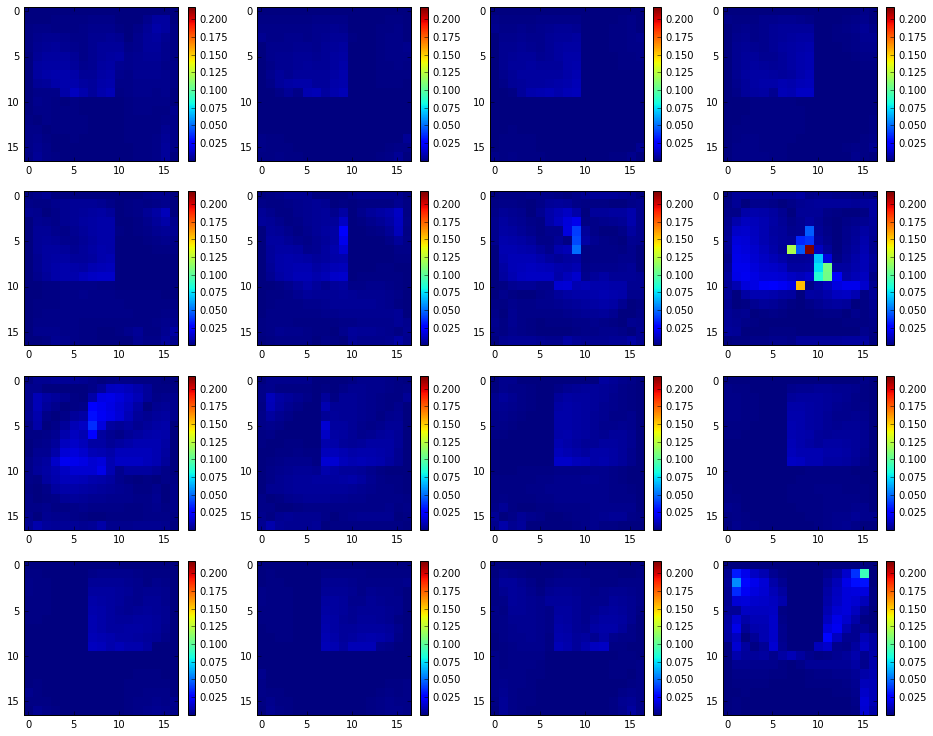

In [84]:
sort_dual = np.sort(data[:,1:],axis=1)
advantage = (sort_dual[:,-1] - sort_dual[:,-2]).reshape((N,N,N))
plot_cube(advantage, "Advantage", 'jet')


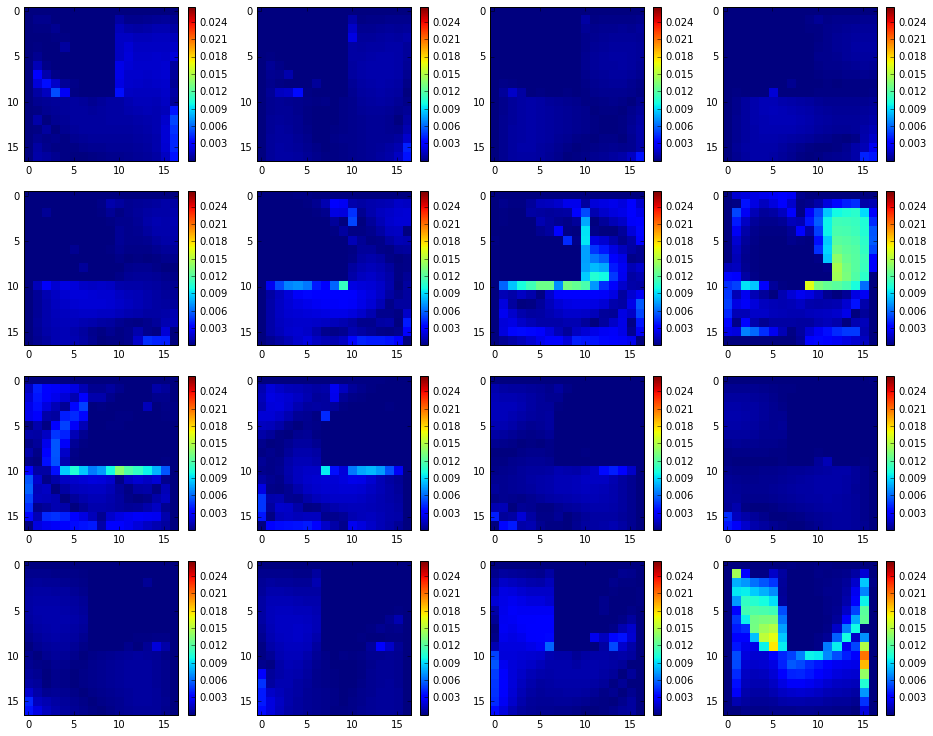

In [85]:
sort_dual = np.sort(data[:,1:],axis=1)
advantage = (sort_dual[:,1] - sort_dual[:,0]).reshape((N,N,N))
plot_cube(advantage, "Disadvantage", 'jet')

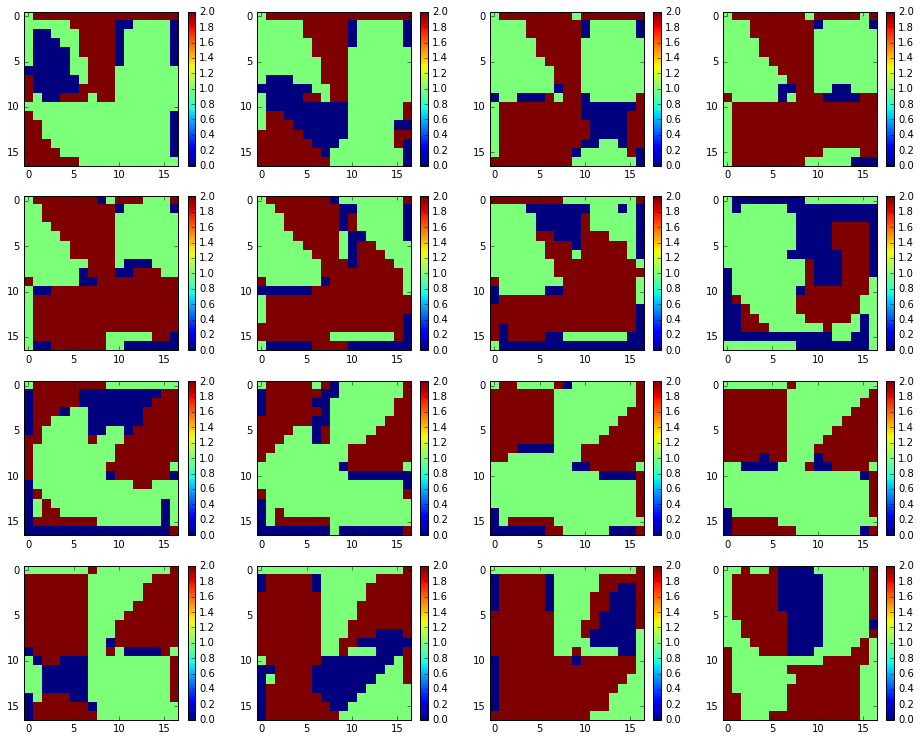

In [81]:
actions = (np.argmax(data[:,1:],axis=1)).reshape((N,N,N))
plot_cube(actions, "Actions", 'jet')


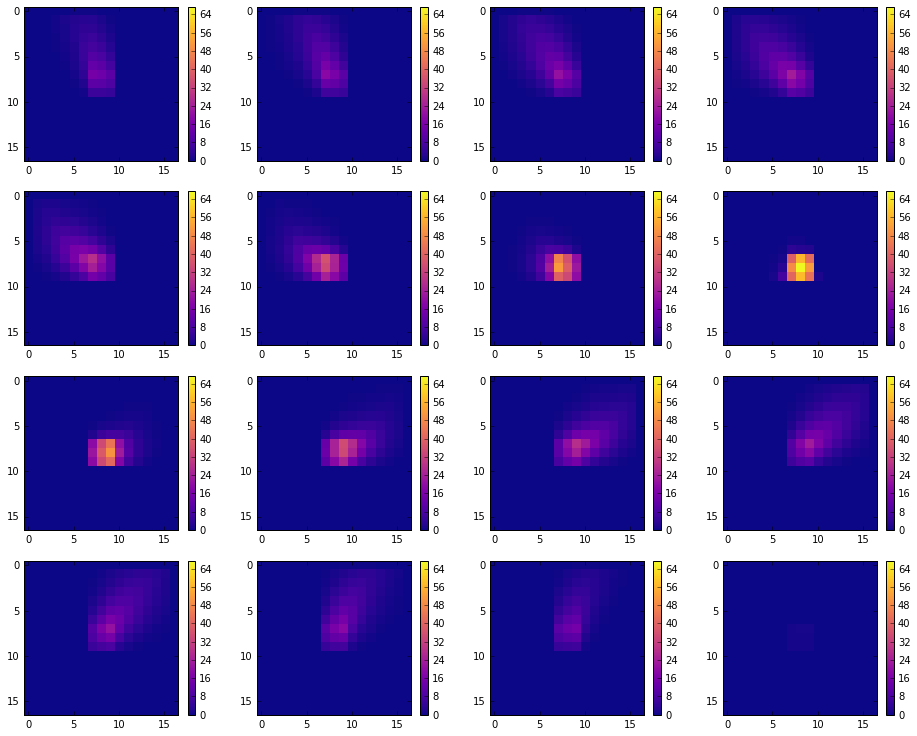

In [82]:
value = (data[:,0]).reshape((N,N,N))
plot_cube(value, "Values", 'plasma')